In [8]:
#################################################################################################
## Import Section & Session creation

from data_session import Session
import numpy as np
import matplotlib.pyplot as plt

file_name = 'V1_SESSION_B20141210_1.mat'

s = Session(file_name,normalized=False)


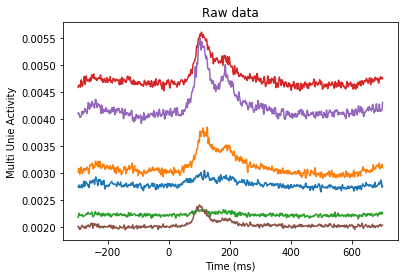

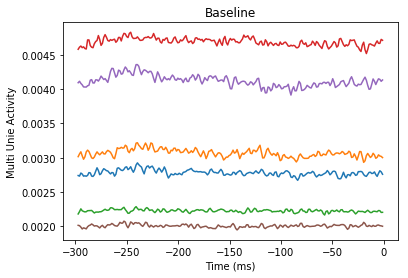

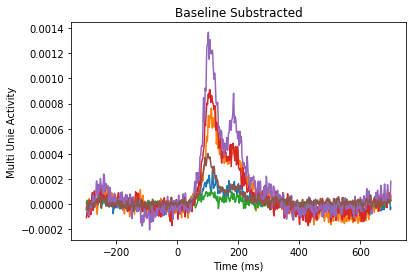

In [11]:
#################################################################################################
##Substracting mean baseline activity

##We use seen data here and contrast #3 
a = s.get_data("seen")[3][:,:,:]

##Extracting seen data
b = s.average_over(a,time=False,channels=False,trials=True)
##Computing baseline (228 correspond to the stimulus offset)
d = s.average_over(b[0:228],time=True)
##Plotting graphs
s._core_figure_1(b,"Raw data",1,True)
s._core_figure_1(b[0:228],"Baseline",1,True,time_window=(0,228))
s._core_figure_1(b-d,"Baseline Substracted",1,True)



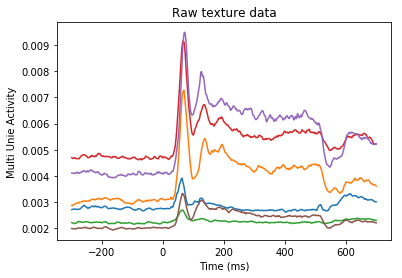

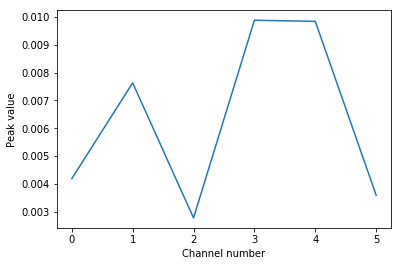

In [14]:
#################################################################################################
##Normalization with peak contrast

##Getting the texture
a = s.get_data("texture")[0]
#Averaging over trials
b = s.average_over(a,time=False,channels=False,trials=True)
#Computing the peak value
d = np.max(b,axis=0)
#Plotting the graphs
s._core_figure_1(b,"Raw texture data",10,True)
plt.plot(d)
plt.xlabel("Channel number")
plt.ylabel("Peak value")
plt.show()

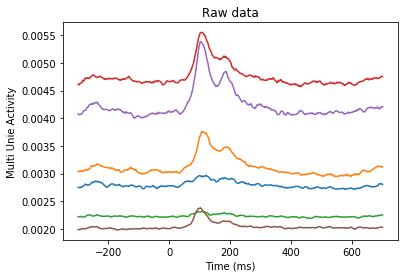

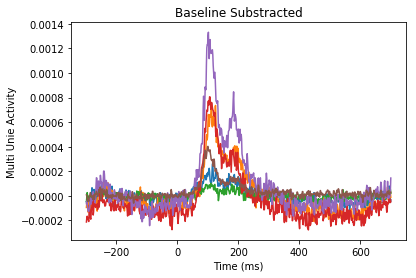

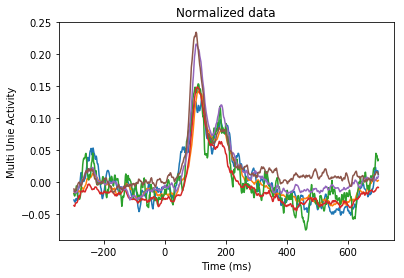

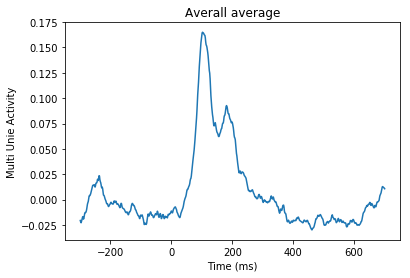

In [16]:
#################################################################################################
#Full normalisation
a = s.get_data("seen")[3][:,:,:]
text = s.get_data("texture")[0]

b = s.average_over(a,time=False,channels=False,trials=True)
bb = s.average_over(s.get_data("seen"),time=False,channels=False,trials=True,contrast=True)
btext = s.average_over(text,time=False,channels=False,trials=True)
baseline = s.average_over(bb[0:228],time=True)
max_peak = np.max(btext-baseline,axis=0)
normalized_data = (b-baseline)/max_peak
s._core_figure_1(b,"Raw data",10,True)
s._core_figure_1(b-baseline,"Baseline Substracted",1,True)
s._core_figure_1(normalized_data,"Normalized data",10,True)
c = np.nanmean(normalized_data,1)
s._core_figure_1(c,"Averall average",10,True)




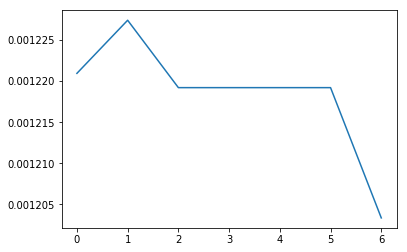

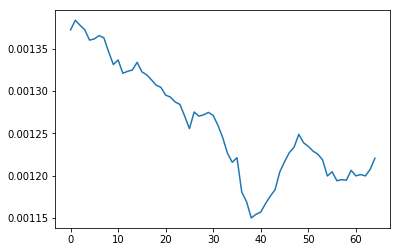

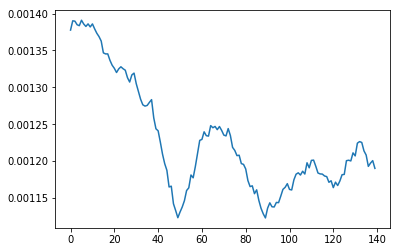

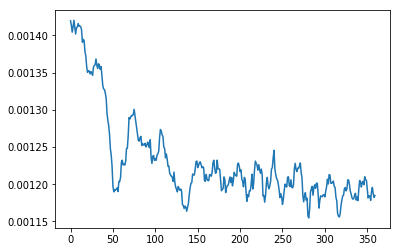

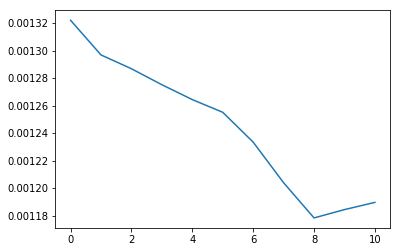

<Figure size 432x288 with 0 Axes>

In [14]:
#Variance decrease over trials
for i in range(5):
    a = s.get_data("seen")[i]
    c = s.smoother(s.var_over(a,channels=True,time=True))
    plt.plot(c)
    plt.figure()